## Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad del vino 🍷🍇

# Integrantes:
📌Marjoris Parejo

📌Leidys Valencia

📌Adriana Maldonado

📌Julio Cesar Rodríguez



### **Explicación del Problema** 🍇
La evaluación de la calidad de los vinos es un proceso crítico en la industria vitivinícola, donde la calidad puede determinar el éxito comercial de un producto. Este proyecto tiene como objetivo desarrollar modelos de clasificación supervisada que permitan predecir la calidad del vino en función de sus características químicas y organolépticas. Para ello, utilizaremos la base de datos Wine Quality disponible en el repositorio UCI, que contiene información sobre diversas muestras de vino, junto con su calidad clasificada.

La calidad del vino se representa en una escala del 0 al 10, pero en este análisis, simplificaremos la variable a categorías discretas, como "baja" 📉 y "alta" 📈, para facilitar el proceso de clasificación.


In [20]:
# Cargar librerías
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
!pip install colorama
from colorama import Fore, Style
import warnings
# librerías relacionadas con modelos de regresión
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
# librerias de sklean necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning

In [21]:
# Ignorar advertencias de convergencia y de uso de parámetros no válidos
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


Se importan las bases de datos tanto la de vino blanco con la de vino rojo y observamos sus estructuras

In [22]:
df_red=pd.read_csv('winequality-red.csv', sep=';')
df_white=pd.read_csv('winequality-white.csv', sep=';')

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Vamos a trabajar con un solo dataframe, de modo que uniremos `df_red` y `df_white`en un dataframe llamado `df_wine`, para identificar el tipo de vino se crea la columna `type`.

In [24]:
df_red['type']='red'
df_white['type']='white'
df_wine=pd.concat([df_red, df_white])
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Observamos la información de nuestro nuevo dataframe para identificar sus variables

In [25]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB



### **Diccionario de datos**📖

<div align="center">

| **Nombre de la Columna**         | **Descripción**                        | **Tipo de Dato (Dtype)** | **Tipo**        |
|-----------------------------------|---------------------------------------|---------------------------|------------------|
| `fixed acidity`                   | Acidez fija del vino.                 | float64                   | Numérica         |
| `volatile acidity`                | Acidez volátil del vino.              | float64                   | Numérica         |
| `citric acid`                     | Cantidad de ácido cítrico presente.   | float64                   | Numérica         |
| `residual sugar`                  | Azúcar residual en el vino.           | float64                   | Numérica         |
| `chlorides`                       | Cantidad de cloruros en el vino.      | float64                   | Numérica         |
| `free sulfur dioxide`             | Dióxido de azufre libre en el vino.   | float64                   | Numérica         |
| `total sulfur dioxide`            | Dióxido de azufre total en el vino.   | float64                   | Numérica         |
| `density`                         | Densidad del vino.                     | float64                   | Numérica         |
| `pH`                              | Nivel de pH del vino.                  | float64                   | Numérica         |
| `sulphates`                       | Cantidad de sulfatos en el vino.       | float64                   | Numérica         |
| `alcohol`                         | Porcentaje de alcohol en el vino.      | float64                   | Numérica         |
| `quality`                         | Calificación del vino (0-10).          | int64                     | Numérica         |
| `type`                         |Tipo de vino (Rojo o blanco).          | object                    | Cualitativa        |

</div>


## **Resumen exploratorio**

El dataset contiene 13 variables, de las cuales 12 son numéricas y 1 cualitativa. Las variables numéricas incluyen características químicas del vino como la acidez, el nivel de sulfatos, el alcohol, y la calidad del vino (de 0 a 10). La única variable cualitativa es el tipo de vino (Rojo o Blanco).

## **Exploración de datos 🍇**

En la fase de exploración de datos 🔎, se utilizó el método `describe()` de pandas para obtener un resumen estadístico del conjunto de datos de vino (`df_wine`). Este método proporciona estadísticas clave, como la media, la desviación estándar, los valores mínimo y máximo, y los cuartiles (25%, 50% y 75%) de las columnas numéricas. Al analizar estos resultados, se puede comprender la distribución de los datos y detectar posibles valores atípicos, lo que ayuda a guiar las decisiones en la preparación de los datos y la selección de características para el modelado.



In [26]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Se utilizó `df_wine.shape` para obtener las dimensiones del conjunto de datos de vino. Este método devuelve una tupla que indica el número de filas y columnas, lo que permite evaluar la cantidad de registros y características disponibles para el análisis y modelado.



In [27]:
df_wine.shape

(6497, 13)

Elaboramos una matriz de correlación para  profundizar en las interacciones entre las variables, lo que resulta valioso para el análisis, la selección de características y la construcción de modelos predictivos más robustos y efectivos.

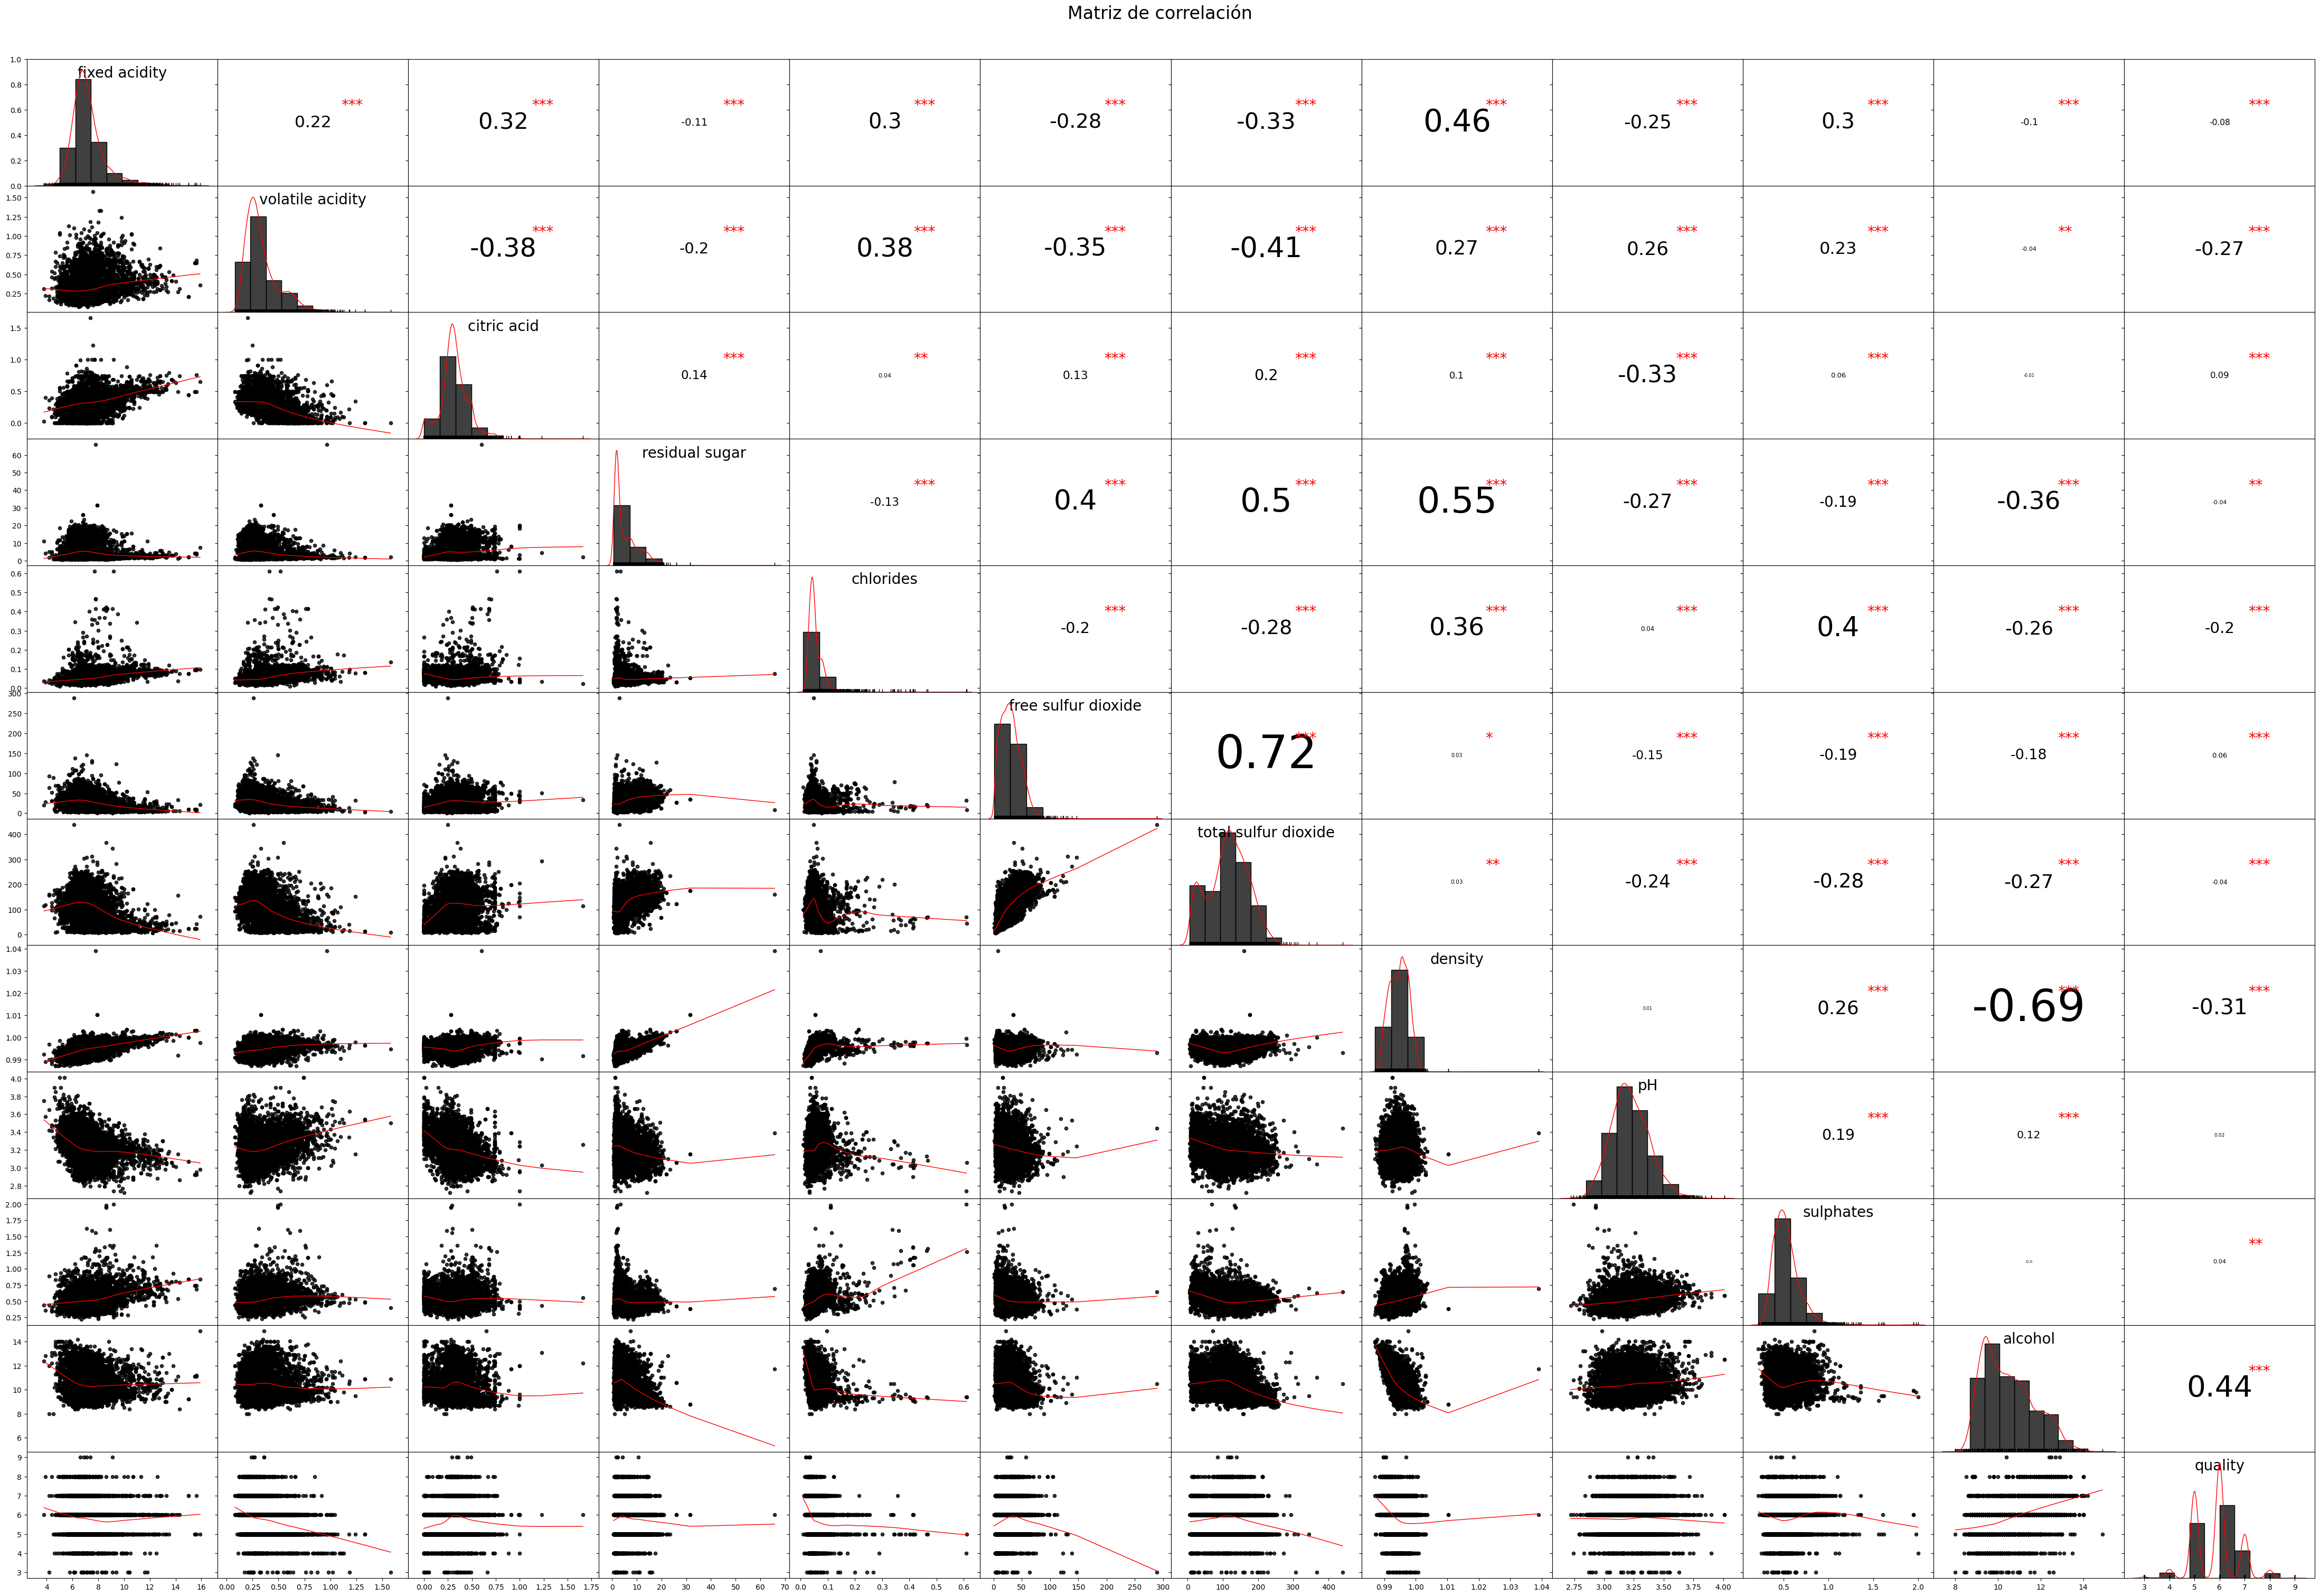

In [28]:
# Matriz de correlaciones

df1= df_wine.select_dtypes(include='number')
# Función para mostrar la correlación
def corrdot(x, y, **kwargs):
    corr_r = x.corr(y)
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5], xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# función para mostrar estrellas de significancia
def corrfunc(x, y, **kwargs):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.001:
        p_stars = '***'
    elif p <= 0.01:
        p_stars = '**'
    elif p <= 0.05:
        p_stars = '*'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=20)

# configura el PairGrid
g = sns.PairGrid(df1, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.histplot, color='black', bins=10, stat='density')  # Cambié a 'density'
g.map_diag(sns.kdeplot, color='red', lw=1)  # Agrega KDE en el diagonal
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# eliminar etiquetas de los ejes
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# añadir títulos a los ejes diagonales
for ax, col in zip(np.diag(g.axes), df1.columns):
    ax.set_title(col, y=0.82, fontsize=20)

plt.suptitle("Matriz de correlación", fontsize=24, y=1.02)

plt.show()

Se ha generado un diagrama de cajas y bigotes para la variable `quality` de los vinos, permitiendo visualizar su distribuciones y variabilidades. Estos gráficos revelan la mediana, los cuartiles y los valores atípicos en las calificaciones de calidad, facilitando la identificación de tendencias y anomalías. Esta exploración es crucial para comprender la calidad de los vinos y guiar el proceso de modelado.

<ipython-input-34-68d4cba9b66c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_wine['type'], y=df_wine['quality'], palette=['#FF9999', '#99CCFF'])


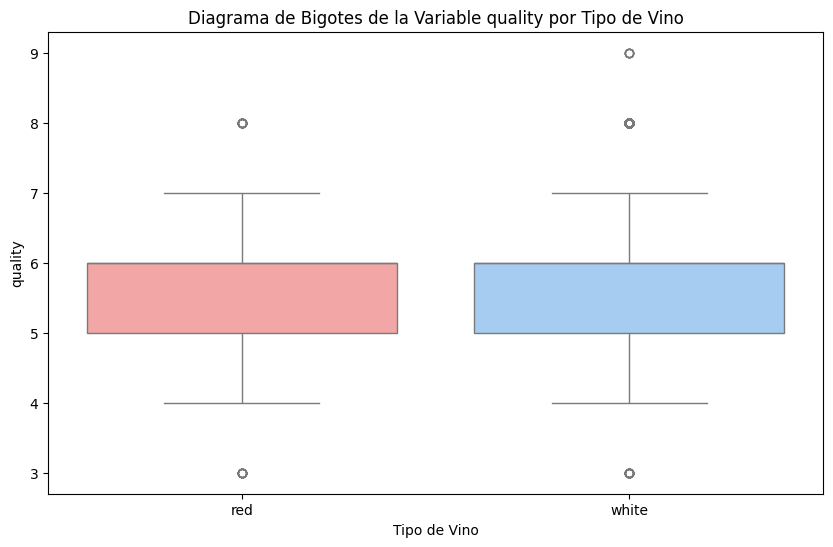

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_wine['type'], y=df_wine['quality'], palette=['#FF9999', '#99CCFF'])
plt.title('Diagrama de Bigotes de la Variable quality por Tipo de Vino')
plt.xlabel('Tipo de Vino')
plt.ylabel('quality')
plt.show()



In [35]:
#  Crear variable categórica que contenga 1 y 0 para describir la calidad del vino.
# 1 = Alta, 0 = Baja
df_wine['calidad'] = df_wine['quality'].apply(lambda x: 1 if x >= 7 else 0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [36]:
df_wine.calidad.value_counts()

,count
calidad,
0,5220
1,1277


In [37]:
# Remplazar la la columna quality por la columna calidad
df_wine.drop(columns = ['quality'], inplace = True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,0


## Modelos 💻

In [38]:
#Preparación de datos
X = df_wine.drop('calidad', axis=1)
y = df_wine['calidad']

**Modelos a evaluar**

**Regresión logística:** es un modelo lineal para clasificación. Calcula la probabilidad de que una instancia pertenezca a una clase específica utilizando una función logística o sigmoide, lo que permite obtener una salida binaria (por ejemplo, 0 o 1).

**K-Nearest Neighbors:** es un modelo de clasificación basado en instancias. Clasifica cada punto de prueba según la mayoría de las clases de sus "K" vecinos más cercanos en el conjunto de entrenamiento.

**XGBoost:** es un modelo basado en ensambles de árboles de decisión, que utiliza el enfoque de Boosting. Es conocido por su eficiencia y alta precisión en clasificación y otros problemas de predicción.

**RandomForestClassifier:** es un modelo de ensamble basado en Bagging que utiliza múltiples árboles de decisión. Cada árbol se entrena en una muestra aleatoria del conjunto de datos, y el modelo final clasifica basándose en el voto mayoritario de todos los árboles.

In [39]:
# Definir los modelos de clasificación
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Crear un diccionario para almacenar los resultados
resultados = {}

wine_types = df_wine['type'].unique()  # Obtener los tipos únicos de vino

# Crear un diccionario para almacenar los resultados por tipo de vino
resultados_por_tipo = {wine_type: {} for wine_type in wine_types}

for wine_type in wine_types:
    # Filtrar los datos por tipo de vino
    df_wine_type = df_wine[df_wine['type'] == wine_type]
    X = df_wine_type.drop(columns=['calidad', 'type'])  # Ajusta las columnas según tus datos
    y = df_wine_type['calidad']

    # Partición de los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # test_size=0.2: indica que el 20% de los datos se reservarán para el conjunto de prueba
    # random_state=42: garantiza que cada vez que se ejecute el código se obtendrá la misma partición
    # stratify=y: la partición conservará la misma proporción de datos clasificados como de Alta o Baja calidad

    # Evaluar cada modelo
    for model_name, model in models.items():
        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Predecir en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular las métricas de evaluación
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)

        # Guardar los resultados por tipo de vino
        resultados_por_tipo[wine_type][model_name] = {
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': confusion
        }

# Imprimir los resultados
for wine_type, modelos in resultados_por_tipo.items():
    print(f"\n{Fore.CYAN}{'=' * 50}{Style.RESET_ALL}\n"
          f"{Fore.GREEN}Resultados para el tipo de vino: {wine_type}{Style.RESET_ALL}\n"
          f"{Fore.CYAN}{'=' * 50}{Style.RESET_ALL}")

    for model_name, metrics in modelos.items():
        print(f"\n{Fore.CYAN}Modelo: {model_name}{Style.RESET_ALL}")
        print(f"{Fore.MAGENTA}Accuracy: {metrics['accuracy']:.2f}{Style.RESET_ALL}")

        print(f"\n{Fore.BLUE}Classification Report:{Style.RESET_ALL}")
        print(pd.DataFrame(metrics['classification_report']).transpose())

        print(f"\n{Fore.BLUE}Confusion Matrix:{Style.RESET_ALL}")
        print(metrics['confusion_matrix'])

        print(f"\n{Fore.CYAN}{'=' * 50}{Style.RESET_ALL}")



Resultados para el tipo de vino: red

Modelo: Random Forest
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score    support
0              0.945017  0.992780  0.968310  277.00000
1              0.931034  0.627907  0.750000   43.00000
accuracy       0.943750  0.943750  0.943750    0.94375
macro avg      0.938026  0.810343  0.859155  320.00000
weighted avg   0.943138  0.943750  0.938974  320.00000

Confusion Matrix:
[[275   2]
 [ 16  27]]


Modelo: Logistic Regression
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score    support
0              0.903654  0.981949  0.941176  277.00000
1              0.736842  0.325581  0.451613   43.00000
accuracy       0.893750  0.893750  0.893750    0.89375
macro avg      0.820248  0.653765  0.696395  320.00000
weighted avg   0.881239  0.893750  0.875391  320.00000

Confusion Matrix:
[[272   5]
 [ 29  14]]


Modelo: K-Nearest Neighbors
Accuracy: 0.86

Classification Report:
              prec

### ***Resultados para Vino Tinto (Red)*** 🍷
<div align="center">

### Vino Tinto (Red)

| Modelo               | Accuracy | Precision  | Recall  | F1-Score  |
|---------------------|----------|---------------------|------------------|---------------------|
| Random Forest       | 0.94     | 0.945               | 0.993            | 0.968               |
| Logistic Regression  | 0.89     | 0.904               | 0.982            | 0.941               |
| K-Nearest Neighbors | 0.86     | 0.889               | 0.957            | 0.922               |
| XGBoost             | 0.95     | 0.955               | 0.986            | 0.970               |


**Para vino tinto**, el modelo **XGBoost** es el mejor, con un accuracy de 0.95 y un F1-score de 0.970.
</div>
---

###***Resultados para Vino Blanco (White)*** 🥂
 <div align="center">

| Modelo               | Accuracy | Precision  | Recall  | F1-Score  |
|---------------------|----------|---------------------|------------------|---------------------|
| Random Forest       | 0.89     | 0.907               | 0.960            | 0.932               |
| Logistic Regression  | 0.81     | 0.826               | 0.952            | 0.884               |
| K-Nearest Neighbors | 0.79     | 0.843               | 0.897            | 0.869               |
| XGBoost             | 0.88     | 0.909               | 0.939            | 0.924               |.88** | **0.824845** | **0.925470 (Clase 0)** | [[714, 39], [76, 151]]    |

**Para vino blanco**, el modelo **Random Forest** es el mejor, con un accuracy de 0.89 y un F1-score de 0.932.

</div>

Tras evaluar múltiples modelos de clasificación en función de su rendimiento en el conjunto de datos de vino, se concluye que:

🍷 Para el vino tinto, el modelo XGBoost se destacó como el mejor, logrando una precisión del 95% y un F1-score de 0.970. Su capacidad para manejar la complejidad del problema y la variabilidad en los datos lo convierte en la opción más robusta para esta categoría.

🥂 Para el vino blanco, el modelo Random Forest demostró ser el más efectivo, con una precisión del 89% y un F1-score de 0.932. Este modelo, caracterizado por su versatilidad y resistencia al sobreajuste, proporciona un rendimiento sólido y fiable.

Ambos modelos muestran un equilibrio adecuado entre precisión y capacidad de generalización, lo que los convierte en herramientas efectivas para la clasificación de calidades de vino.